In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor


import warnings
warnings.filterwarnings("ignore")  # ignore les warnings


In [ ]:
@dataclass
class ModelTrainerconfig:
    trained_model_file_path=os.path.join("artifacts","model.pkl")
class ModelTrainer:
    def __init__(self):
        self.model_trainer_config=ModelTrainerconfig

def initiate_model_trainer(self,train_array,preprocessor_path)
    try: 
        logging.info("split trainning and test input data") 
        xtrain,y_train,x_test,y_test=(
            train_array[:,:-1],
            train_array[:,-1],
            test_array[:,:-1],
            test_array[:,-1],

        )
    


In [43]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install numpy pandas matplotlib seaborn scikit-learn catboost xgboost


Note: you may need to restart the kernel to use updated packages.


In [50]:
df = pd.read_csv('StudentsPerformance.csv')

In [51]:
df.head

<bound method NDFrame.head of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none      

In [52]:
x = df.drop(columns=['math  score'],axis=1)

KeyError: "['math  score'] not found in axis"

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Séparer les variables numériques et catégorielles
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

# Préprocesseurs
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown="ignore")

# Combinaison avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)


NameError: name 'StandardScaler' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
x=preprocessor.fit_transform

In [ ]:
# Appliquer la transformation sur x
x_transformed = preprocessor.fit_transform(x)

print("Type:", type(x_transformed))
print("Shape:", x_transformed.shape)


Type: <class 'numpy.ndarray'>
Shape: (1000, 19)


In [ ]:
import numpy as np 
import pandas as pd
import dill
from src.exception import CustomException




In [ ]:
print("categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("categorie in 'race/ethnicity' variable: ",end="")
print(df['race/ethnicity'].unique())

print ("categorie in parental level of education' variable:",end="")
print(df['parental level of education'].unique())

print("categorie in'lunch' variable:",end=" ")
print(df['lunch'].unique())
print("categories in 'test preparation course'variable:  ",end="")
print(df['test preparation course'].unique())


categories in 'gender' variable:    ['female' 'male']
categorie in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categorie in parental level of education' variable:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categorie in'lunch' variable: ['standard' 'free/reduced']
categories in 'test preparation course'variable:  ['none' 'completed']


In [ ]:
y = df['math score']

In [ ]:
y = df["math score"]     # variable cible
x = df.drop(columns=["math score"])   # variables explicatives


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

x_train.shape, x_test.shape


((800, 7), (200, 7))

In [ ]:
def evaluated_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [54]:
from sklearn.pipeline import Pipeline

# Dictionnaire de modèles
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor(),
    # CatBoost si installé
     "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

# Boucle sur les modèles
for name, regressor in models.items():
    # Création d'un pipeline : préprocesseur + modèle
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),  # gère OneHotEncoder et StandardScaler
        ("regressor", regressor)
    ])

    # Entraînement
    pipeline.fit(x_train, y_train)

    # Prédictions
    y_train_pred = pipeline.predict(x_train)
    y_test_pred = pipeline.predict(x_test)

    # Évaluations
    model_train_mae, model_train_rmse, model_train_r2 = evaluated_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluated_model(y_test, y_test_pred)

    # Affichage
    print(f"🔹 {name}")
    print("Model performance for Training set")
    print(f"  MAE: {model_train_mae:.4f}")
    print(f"  RMSE: {model_train_rmse:.4f}")
    print(f"  R2: {model_train_r2:.4f}")
    print("Model performance for Test set")
    print(f"  MAE: {model_test_mae:.4f}")
    print(f"  RMSE: {model_test_rmse:.4f}")
    print(f"  R2: {model_test_r2:.4f}")
    print("="*40)

    model_list.append(name)
    r2_list.append(model_test_r2)


🔹 Linear Regression
Model performance for Training set
  MAE: 4.2677
  RMSE: 5.3244
  R2: 0.8743
Model performance for Test set
  MAE: 4.2173
  RMSE: 5.3967
  R2: 0.8803
🔹 Lasso
Model performance for Training set
  MAE: 5.2053
  RMSE: 6.5925
  R2: 0.8072
Model performance for Test set
  MAE: 5.1557
  RMSE: 6.5173
  R2: 0.8254
🔹 K-Neighbors Regressor
Model performance for Training set
  MAE: 4.5042
  RMSE: 5.6974
  R2: 0.8560
Model performance for Test set
  MAE: 5.5880
  RMSE: 7.2172
  R2: 0.7859
🔹 Decision Tree
Model performance for Training set
  MAE: 0.0187
  RMSE: 0.2795
  R2: 0.9997
Model performance for Test set
  MAE: 6.2250
  RMSE: 7.7010
  R2: 0.7563
🔹 Random Forest
Model performance for Training set
  MAE: 1.8174
  RMSE: 2.2947
  R2: 0.9766
Model performance for Test set
  MAE: 4.5990
  RMSE: 5.9774
  R2: 0.8532
🔹 XGB Regressor
Model performance for Training set
  MAE: 0.6875
  RMSE: 1.0073
  R2: 0.9955
Model performance for Test set
  MAE: 5.0577
  RMSE: 6.4733
  R2: 0.8278


In [60]:
# Création du DataFrame et tri par R2_score
results = (
    pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_score'])
    .sort_values(by="R2_score", ascending=False)  # <= guillemets obligatoires
    .reset_index(drop=True)
)

print(results)


              Model Name  R2_score
0      Linear Regression  0.880315
1          Random Forest  0.853171
2     CatBoost Regressor  0.851831
3     AdaBoost Regressor  0.848991
4          XGB Regressor  0.827797
5                  Lasso  0.825446
6  K-Neighbors Regressor  0.785944
7          Decision Tree  0.756286


In [ ]:
pip install xgboost


In [64]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Encodage des variables catégorielles
x_train_encoded = pd.get_dummies(x_train, drop_first=True)
x_test_encoded  = pd.get_dummies(x_test, drop_first=True)

# Alignement des colonnes (au cas où certaines catégories n'existent pas dans test ou train)
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)

# Modèle
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train_encoded, y_train)

# Prédictions
y_pred = lin_model.predict(x_test_encoded)

# Score
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 88.04


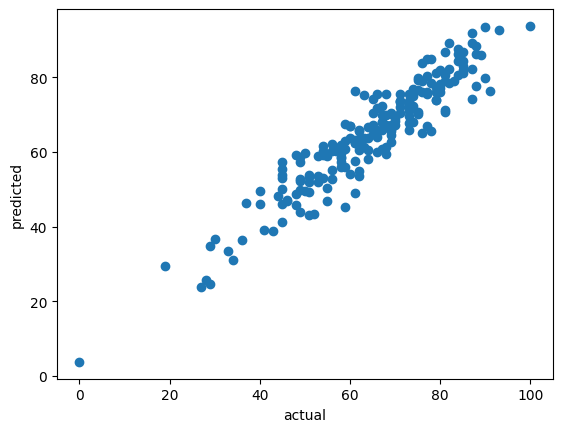

In [65]:
plt.scatter(y_test,y_pred);
plt.xlabel('actual');
plt.ylabel('predicted');

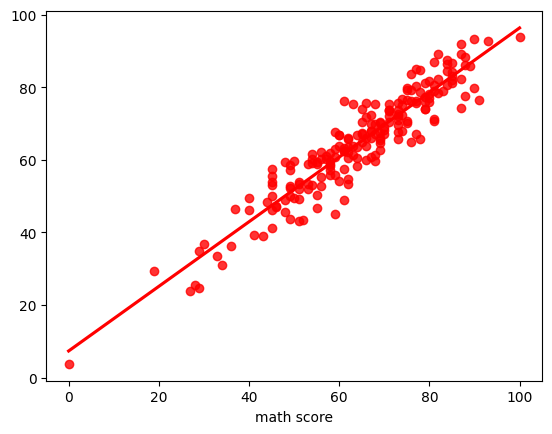

In [66]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

In [67]:
pred_df = pd.DataFrame({
    'Actual value': y_test,
    'Predicted value': y_pred,
    'Difference': y_test - y_pred
})
pred_df


,Actual value,Predicted value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


In [63]:
print(x_train.dtypes)   # Vérifie si toutes les colonnes sont numériques
print(y_train.dtypes)   # Vérifie la cible
print(x_train.isnull().sum())  # Vérifie s'il y a des NaN
print(y_train.isnull().sum())


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
reading score                   int64
writing score                   int64
dtype: object
int64
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
reading score                  0
writing score                  0
dtype: int64
0
